# Preparing data for the model

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, make_scorer


from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

In [2]:
FILE_PATH = './data/pickles/02_tokenized_descriptions.pkl'

data = pd.read_pickle(FILE_PATH)
data

,description,variety,desc_clean
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon,tremend 100% variet wine hail oakvill age thre...
1,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc,mac watson honor memori wine made mother treme...
2,"This spent 20 months in 30% new French oak, an...",Pinot Noir,spent 20 month 30% new french oak incorpor fru...
3,This re-named vineyard was formerly bottled as...,Pinot Noir,name vineyard former bottl delancellotti find ...
4,The producer sources from two blocks of the vi...,Pinot Noir,produc sourc two block vineyard wine one high ...
...,...,...,...
64728,"This needs a good bit of breathing time, then ...",Pinot Noir,need good bit breath time begin reveal cherri ...
64729,The nose is dominated by the attractive scents...,Pinot Noir,nose domin attract scent new french oak hint p...
64730,"Decades ago, Beringer’s then-winemaker Myron N...",White Blend,decad ago bering winemak myron nightingal crea...
64731,Many people feel Fiano represents southern Ita...,White Blend,mani peopl feel fiano repres southern itali pr...


**Before fitting data into the model, let's check the variety distribution once again**

In [12]:
data.variety.value_counts()

Pinot Noir                  9283
Chardonnay                  9159
Cabernet Sauvignon          8267
Red Blend                   6484
Bordeaux-style Red Blend    5170
Sauvignon Blanc             4034
Syrah                       3662
Riesling                    3582
Merlot                      3176
Zinfandel                   2408
Sangiovese                  2152
Malbec                      1967
Rosé                        1910
White Blend                 1857
Tempranillo                 1622
Name: variety, dtype: int64

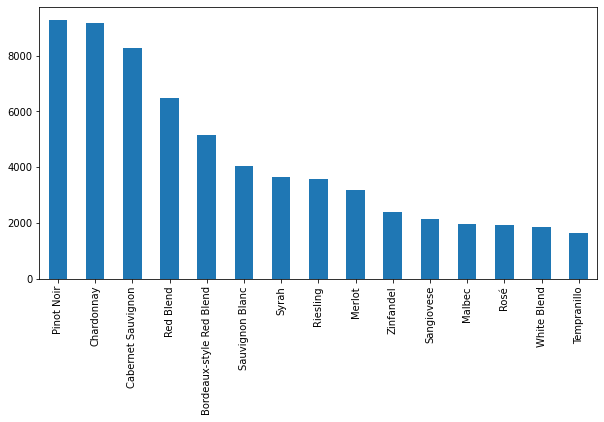

In [11]:
fig = plt.figure(figsize=(10,5))
data.variety.value_counts().plot.bar(ylim=0)

## Train test split

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
input_data = vectorizer.fit_transform(data.desc_clean)

# if check of the input_data is needed
# pd.DataFrame(input_data.toarray(), columns=vectorizer.get_feature_names())

In [26]:
X_train, X_test, y_train, y_test = train_test_split(input_data, data.variety, test_size = 0.2, random_state = 42)

## Baseline models

Let's start our prediction with Naive Bayes model as the baseline. Additionally let's create a function which allow us to evaluate trained models quickly.

In [37]:
# function for tuning hyperparams of a classifiers

def tune_and_fit(clf, p_grid, cv = 5, X_train = X_train, y_train = y_train):   
    grid = GridSearchCV(clf, param_grid = p_grid, cv = cv, n_jobs = -1, verbose = True, 
                        scoring = make_scorer(f1_score, average='weighted'))
    grid.fit(X_train,y_train)
    print('Best parameters found: ')
    print(grid.best_params_)
    print('\n Best score:')
    print(grid.best_score_)
    
    return grid.best_estimator_

In [32]:
# function to evalute models on the test set

def evaluate_model(model, X_test = X_test, y_test = y_test):
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))

### Multinomial Naive Bayes Baseline

In [43]:
%%time
multinomial_NB_base = MultinomialNB()

multinomial_NB_base.fit(X_train,y_train)
evaluate_model(multinomial_NB_base)

                          precision    recall  f1-score   support

Bordeaux-style Red Blend       0.64      0.69      0.66      1033
      Cabernet Sauvignon       0.53      0.73      0.61      1583
              Chardonnay       0.81      0.90      0.85      1880
                  Malbec       0.41      0.35      0.38       390
                  Merlot       0.60      0.19      0.29       683
              Pinot Noir       0.76      0.77      0.76      1914
               Red Blend       0.55      0.68      0.61      1292
                Riesling       0.83      0.83      0.83       694
                    Rosé       0.80      0.62      0.70       356
              Sangiovese       0.68      0.47      0.56       396
         Sauvignon Blanc       0.77      0.71      0.74       806
                   Syrah       0.74      0.44      0.55       720
             Tempranillo       0.41      0.46      0.44       352
             White Blend       0.82      0.54      0.65       365
         

### Support Vector Machines Baseline - One vs. Rest

In [41]:
svm_base = SVC(decision_function_shape='ovr')

svm_base.fit(X_train,y_train)
evaluate_model(svm_base)

                          precision    recall  f1-score   support

Bordeaux-style Red Blend       0.78      0.75      0.76      1033
      Cabernet Sauvignon       0.58      0.81      0.67      1583
              Chardonnay       0.79      0.94      0.86      1880
                  Malbec       0.67      0.44      0.53       390
                  Merlot       0.86      0.44      0.58       683
              Pinot Noir       0.75      0.84      0.79      1914
               Red Blend       0.67      0.68      0.68      1292
                Riesling       0.86      0.82      0.84       694
                    Rosé       0.82      0.74      0.78       356
              Sangiovese       0.73      0.53      0.61       396
         Sauvignon Blanc       0.82      0.73      0.77       806
                   Syrah       0.80      0.56      0.66       720
             Tempranillo       0.51      0.43      0.47       352
             White Blend       0.85      0.58      0.69       365
         

### Linear Support Vector Machines

In [48]:
%%time
linear_svm_base = LinearSVC()

linear_svm_base.fit(X_train,y_train)
evaluate_model(linear_svm_base)

                          precision    recall  f1-score   support

Bordeaux-style Red Blend       0.70      0.71      0.71      1033
      Cabernet Sauvignon       0.65      0.69      0.67      1583
              Chardonnay       0.83      0.87      0.85      1880
                  Malbec       0.46      0.45      0.45       390
                  Merlot       0.56      0.48      0.52       683
              Pinot Noir       0.77      0.80      0.79      1914
               Red Blend       0.67      0.65      0.66      1292
                Riesling       0.81      0.82      0.82       694
                    Rosé       0.70      0.72      0.71       356
              Sangiovese       0.58      0.58      0.58       396
         Sauvignon Blanc       0.75      0.73      0.74       806
                   Syrah       0.66      0.60      0.63       720
             Tempranillo       0.51      0.47      0.49       352
             White Blend       0.70      0.56      0.63       365
         